<center><b><h1 style="font-size: 60px; color: red;"><u>COPD Detection</u></h1></b></center>
<br>

<center><b><h1 style="font-size: 30px;"><u>Extracting the data from zip file</u></h1></b></center>

In [1]:
import zipfile

In [2]:
def zipextract(name):
    with zipfile.ZipFile(name,'r') as zip_ref:
        zip_ref.extractall()

In [3]:
# zipextract('COPD.zip')

In [4]:
# zipextract('NORMAL1.zip')

In [5]:
import os
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [6]:
root = 'COPD'
fn = os.listdir(root)

In [7]:
len(fn)

14

<center><b><h1 style="font-size: 30px;"><u>Preprocessing the DICOM dataset.</u></h1></b></center>

In [8]:
def file_conversion1(source_directory,destination_directory):
    # List all files in the source directory
    files = os.listdir(source_directory)
    # Loop through each file and rename and move it
    for file_name in files:
        # Check if the file doesn't already have the ".dcm" extension
        if file_name.endswith(".dcm"):
            # Create the new file name with the ".dcm" extension
            new_file_name = file_name + ".png"
#             i+=1
            # Construct the full path for the old and new file names in the source directory
            old_file_path = os.path.join(source_directory, file_name)
            new_file_path_source = os.path.join(source_directory, new_file_name)

            # Construct the full path for the new file name in the destination directory
            new_file_path_destination = os.path.join(destination_directory, new_file_name)

            # Rename and move the file to the destination directory
            os.rename(old_file_path, new_file_path_destination)

            print(f"Moved and Renamed: {old_file_path} -> {new_file_path_destination}")
        else:
            print(f"Skipped: {file_name} (already has '.png' extension)")


In [9]:
# liscopd = ['2','4','SE','SE00001','SE00002', 'SE2', 'SE4', 'SE5']
# lisnorm = ['2','4', 'SE00002', 'SE00003']
# copd = []
# norm = []
# i=0
# for name in liscopd:
#     path = os.path.join('COPD',name)
#     images = os.listdir(path)
#     file_conversion(path,'dcm/COPD',i)
#     for image in images:
#         i+=1
# j=0
# for name in lisnorm:
#     path = os.path.join('NORMAL1',name)
#     images = os.listdir(path)
#     file_conversion(path,'dcm/NORMAL',j)
#     for image in images:
#         j+=1

In [10]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

def apply_ct_window(img, window):
    window = (500, 50)
    R = (img-window[1]+0.5*window[0])/window[0]
    R[R<0] = 0
    R[R>1] = 1
    return R

def img_read(path): 
    # Load DICOM file
    dicom_file_path = path
    dicom_data = pydicom.dcmread(dicom_file_path)

    # Extract pixel data
    img = dicom_data.pixel_array

    img = img.astype(np.uint16)
    img = img*dicom_data.RescaleSlope + dicom_data.RescaleIntercept

    display_img = apply_ct_window(img,[400,50])
    return display_img

In [11]:
# di = 'dcm'
# copdd = os.listdir('dcm/COPD')
# norm = os.listdir('dcm/NORMAL')
# for img in copdd:
#     fileconversion1(di,'png/COPD')
# def dicom_to_jpg(dicom_file_path, output_directory):
#     # Read DICOM image
#     dicom_data = pydicom.dcmread(dicom_file_path)
    
#     # Convert pixel array to a numpy array
#     pixel_array = dicom_data.pixel_array

#     # Normalize pixel values to be between 0 and 255
#     normalized_pixel_array = (pixel_array / np.max(pixel_array) * 255).astype(np.uint8)

#     # Create an Image from the numpy array
#     image = Image.fromarray(normalized_pixel_array)

#     # Create the output directory if it doesn't exist
#     os.makedirs(output_directory, exist_ok=True)

#     # Save the image as a JPEG file
#     output_path = os.path.join(output_directory, os.path.basename(dicom_file_path).replace('.dcm', '.jpg'))
#     image.save(output_path)

In [12]:
path1 = 'dcm/COPD'
path2 = 'dcm/NORMAL'
copd = []
norm = []
copdd = os.listdir(path1)
normal = os.listdir(path2)
i=0
for i in range(0, len(copdd)):
    image_path = os.path.join(path1, str(i) + '.dcm')
    image = img_read(image_path)
    copd.append(image)
    i+=1
for j in range(0, len(normal)):
    image_path = os.path.join(path2, str(j) + '.dcm')
    image = img_read(image_path)
    norm.append(image)
    j+=1

In [13]:
len(copd)

2784

In [14]:
len(norm)

924

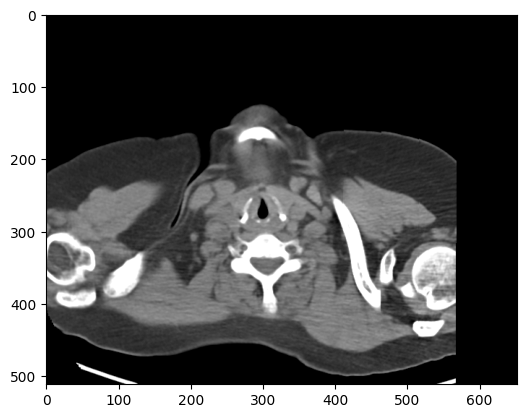

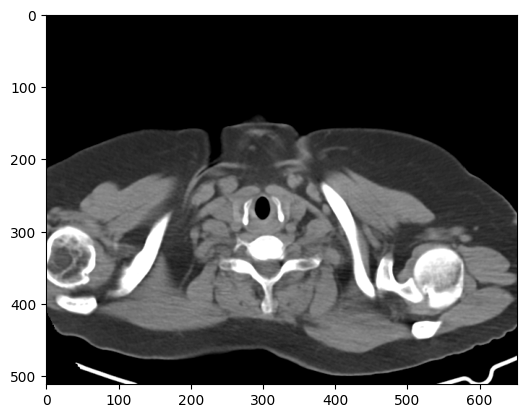

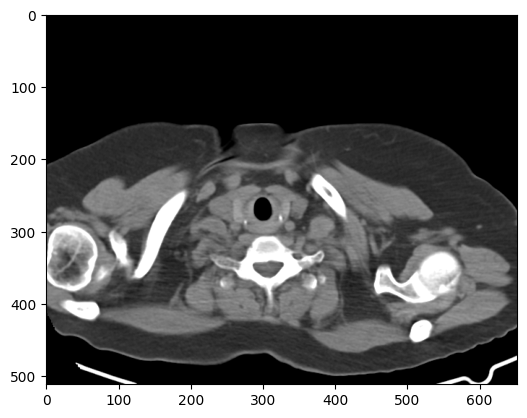

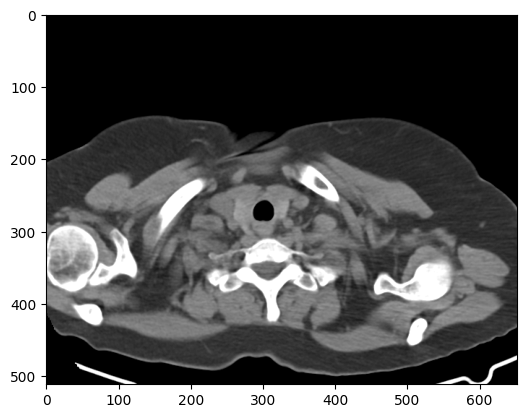

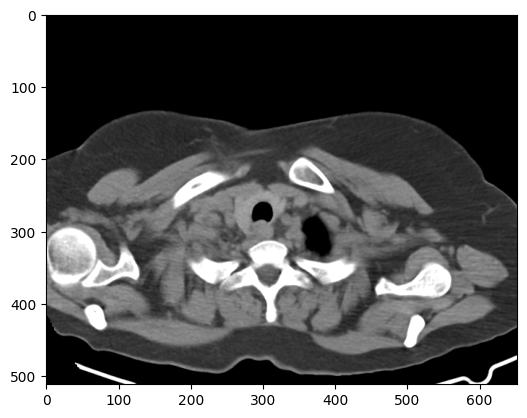

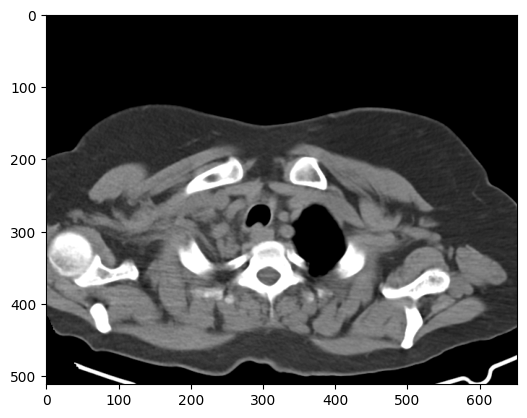

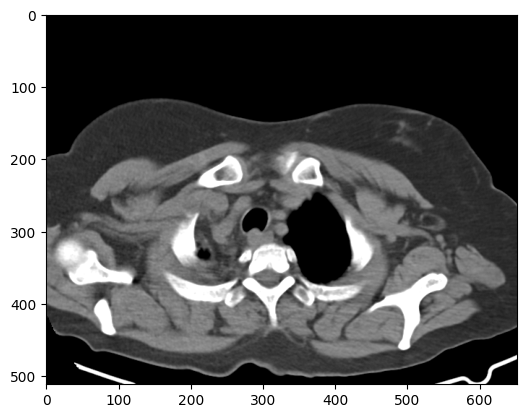

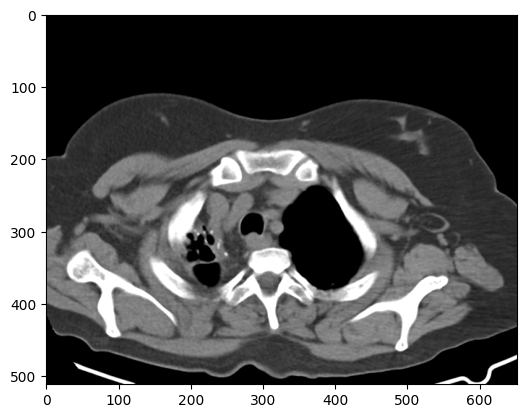

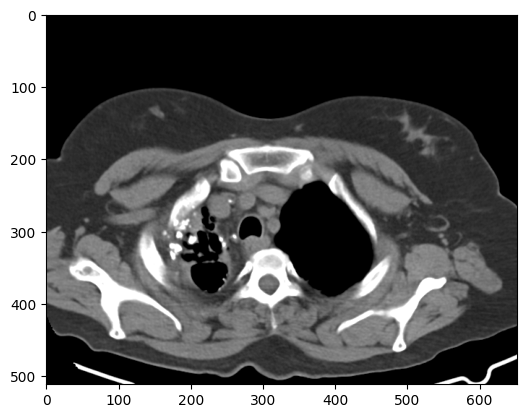

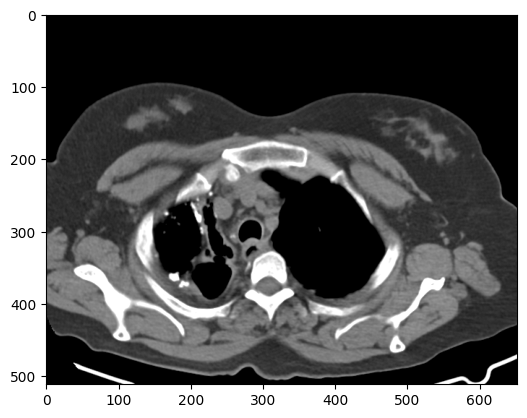

In [15]:
i=0
for image in copd:
    i+=1
    plt.imshow(image, cmap='gray')
    plt.show()
#     plt.show(image,cmap = 'gray')
    if(i==10):
        break

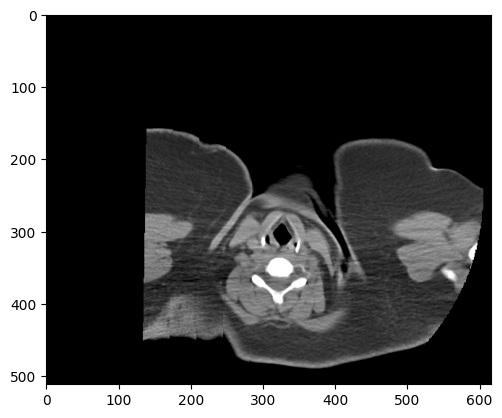

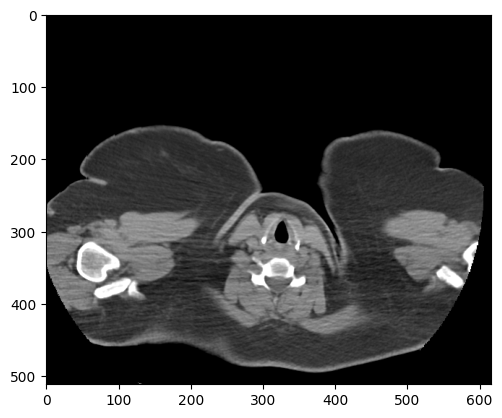

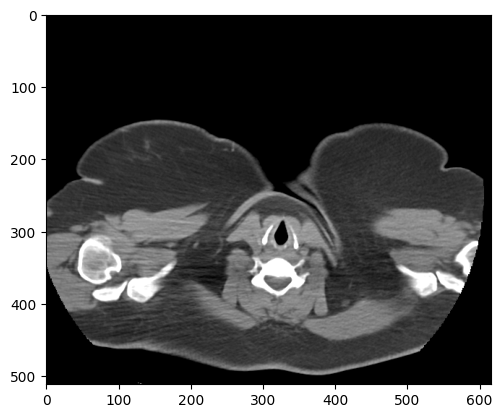

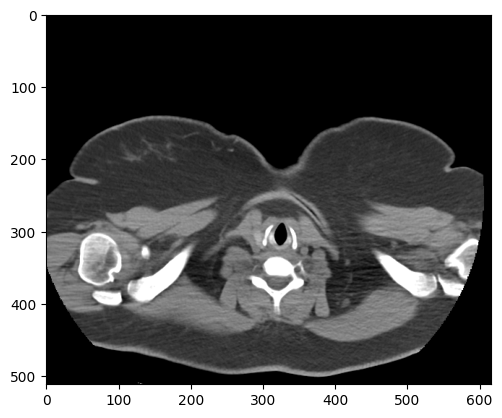

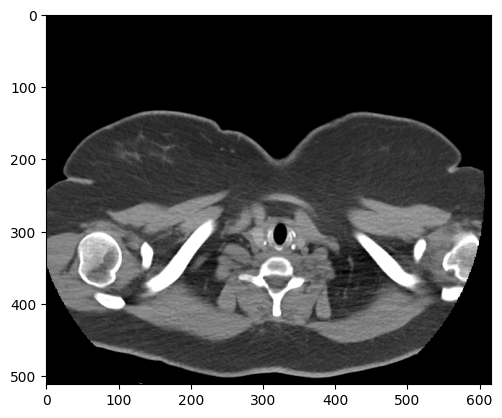

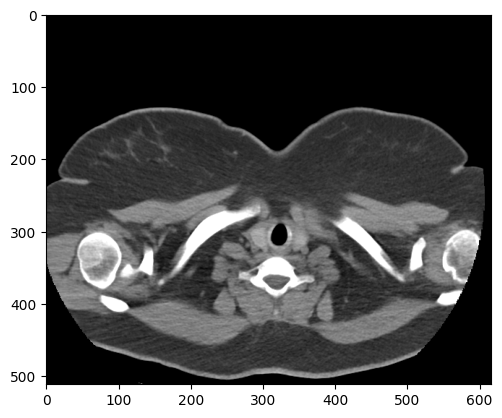

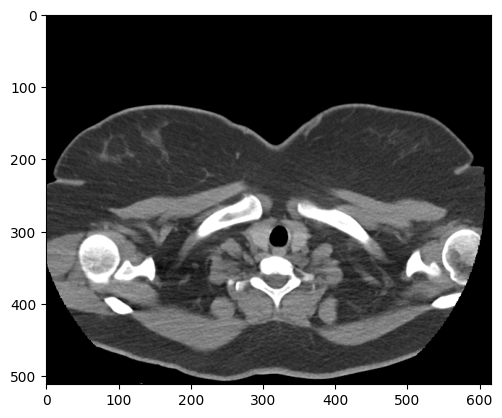

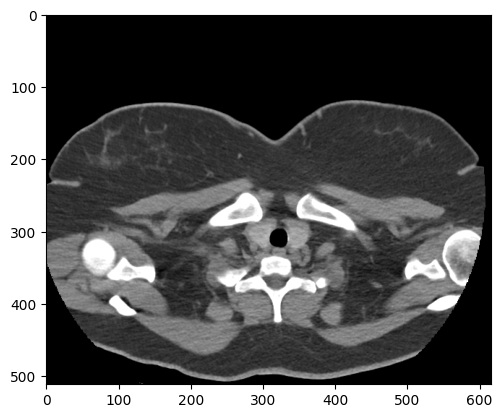

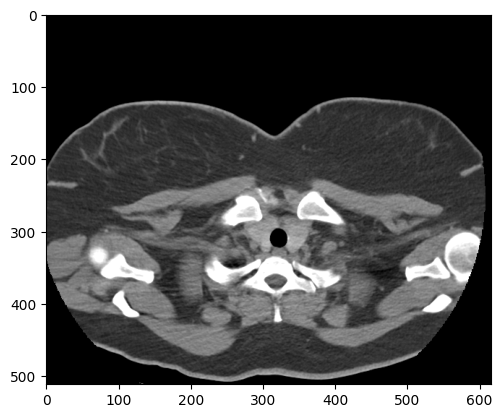

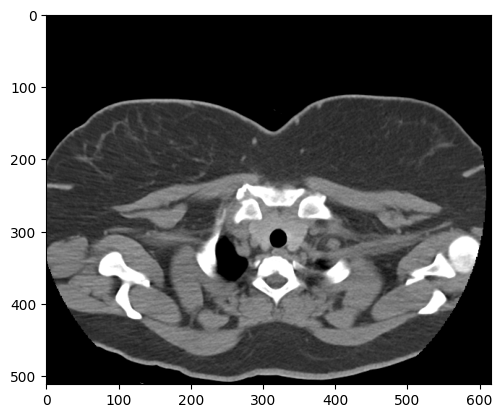

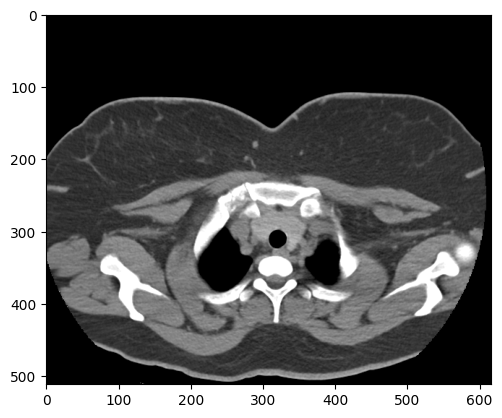

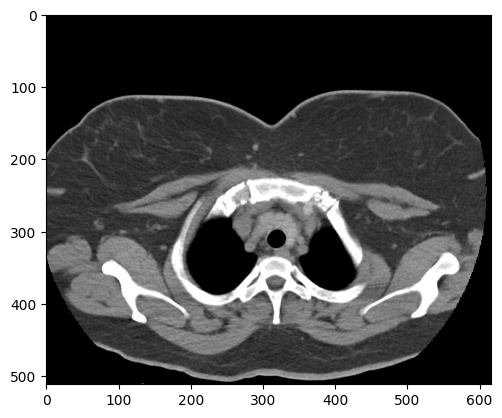

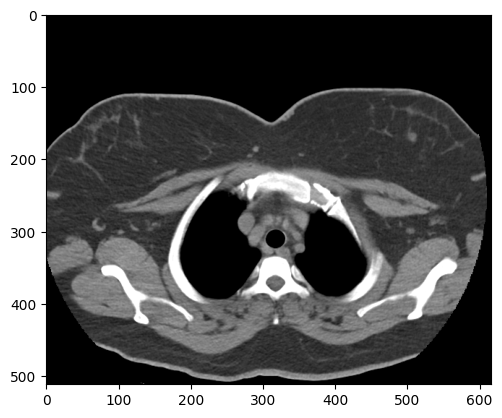

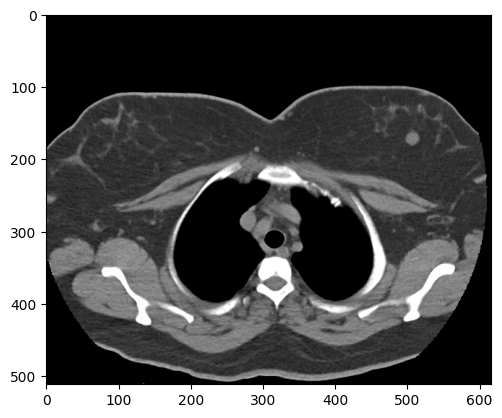

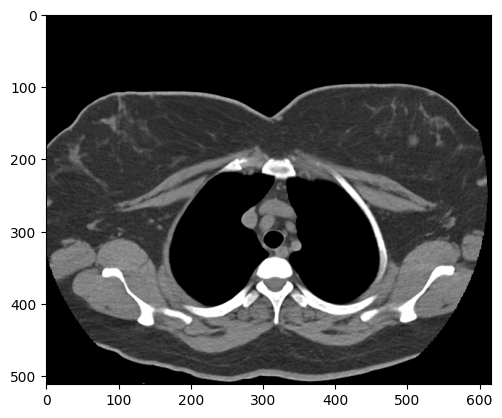

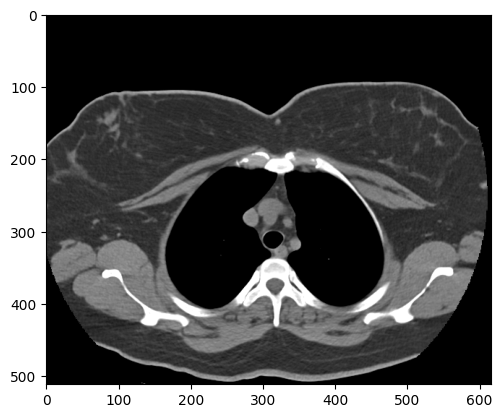

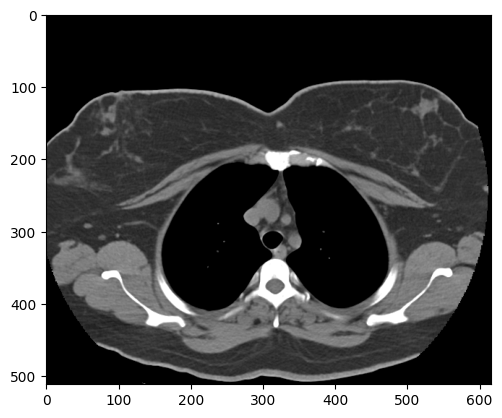

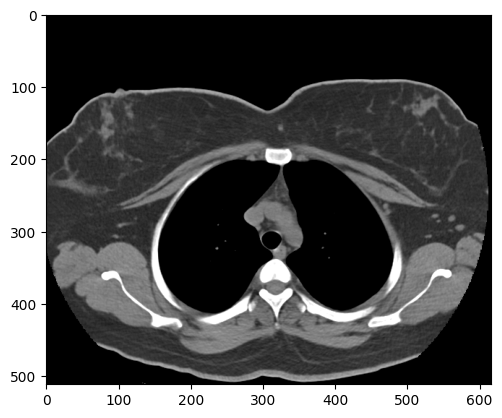

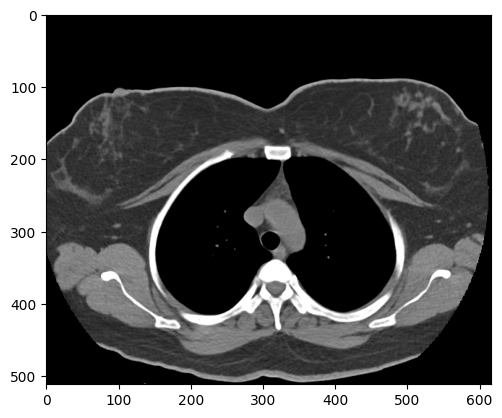

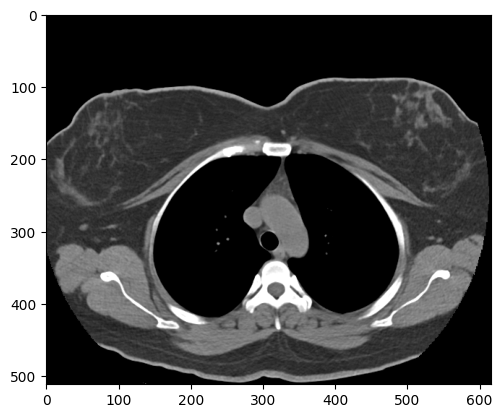

In [16]:
i=0
for image in norm:
    i+=1
    plt.imshow(image, cmap='gray')
    plt.show()
#     plt.show(image,cmap = 'gray')
    if(i==20):
        break

In [17]:
def save_images(images, output_path, file_format='png'):
    os.makedirs(output_path, exist_ok=True)
    for i, image in enumerate(images):
        image_np = (image * 255).astype(np.uint8)
        pil_image = Image.fromarray(image_np)
        image_filename = f"{i+1}.{file_format}"
        image_path = os.path.join(output_path, image_filename)
        pil_image.save(image_path)

In [18]:
# Specify the output directories for COPD and NORMAL images
output_copd_path = "png/COPD"
output_normal_path = "png/NORMAL"

In [19]:
# Process and save COPD images
save_images(copd, output_copd_path)

# Process and save NORMAL images
save_images(norm, output_normal_path)

In [20]:
copd_final = []
norm_final= []

copd_f= os.listdir(output_copd_path)
normal_f = os.listdir(output_normal_path)


for i, filename in enumerate(copd_f):
    if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(output_copd_path, filename)
            copd_final.append(plt.imread(image_path))


for i, filename in enumerate(normal_f):
    if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(output_normal_path, filename)
            norm_final.append(plt.imread(image_path))

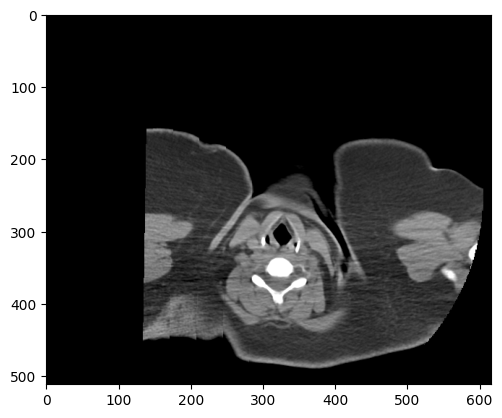

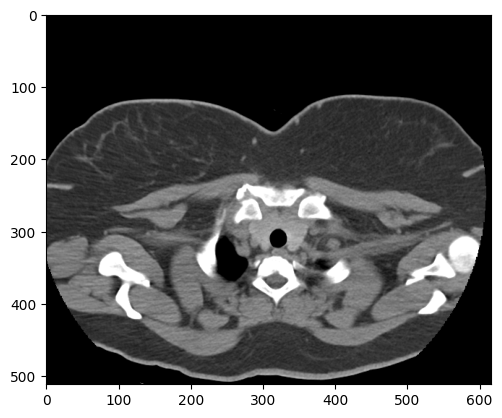

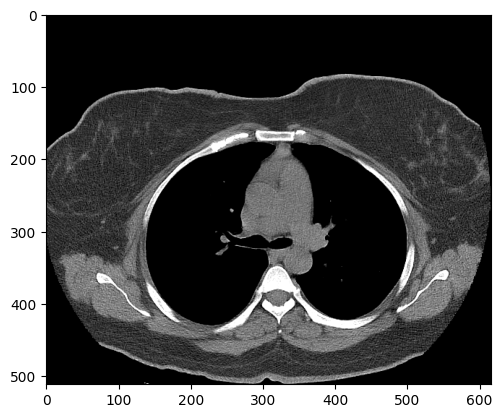

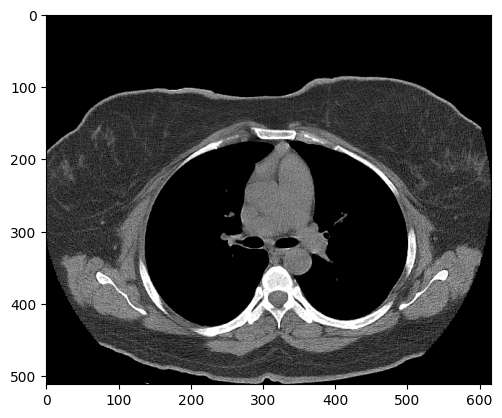

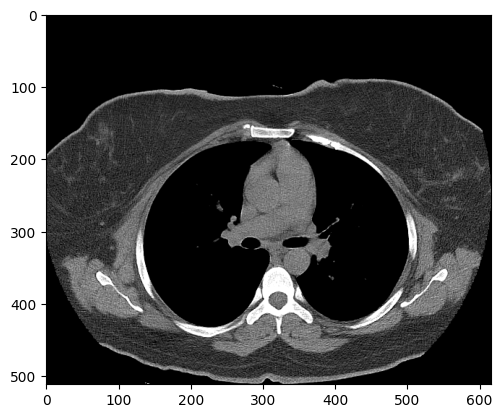

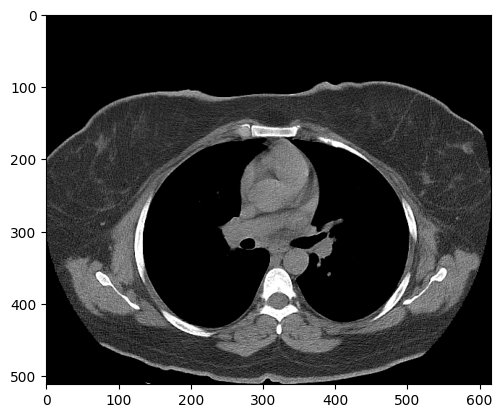

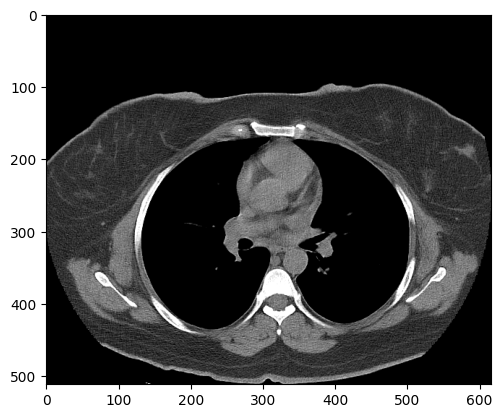

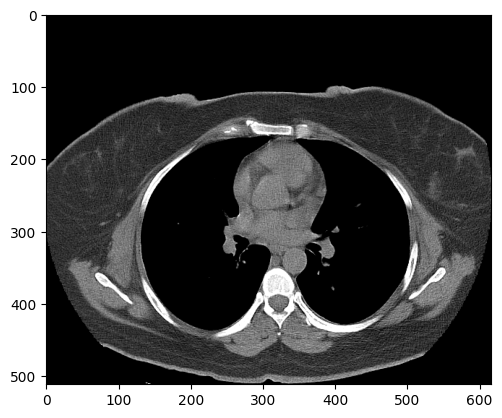

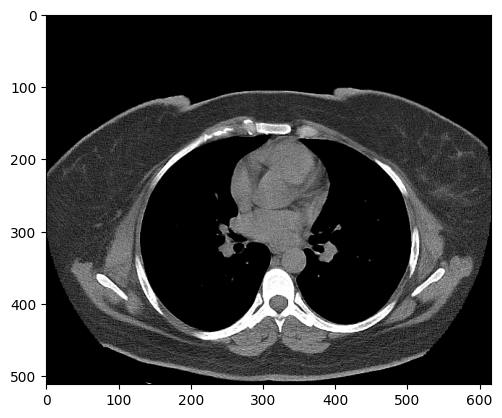

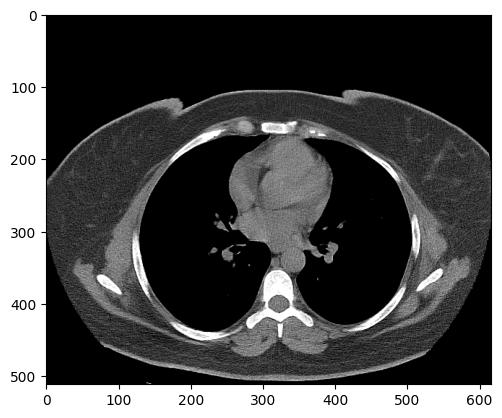

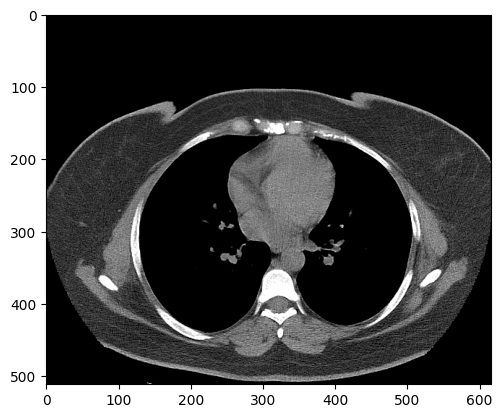

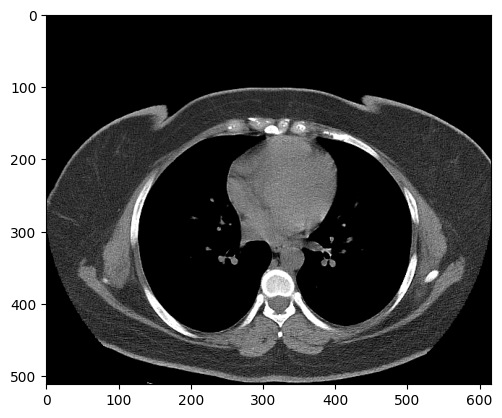

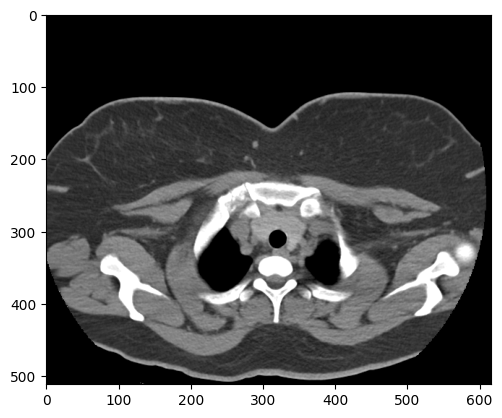

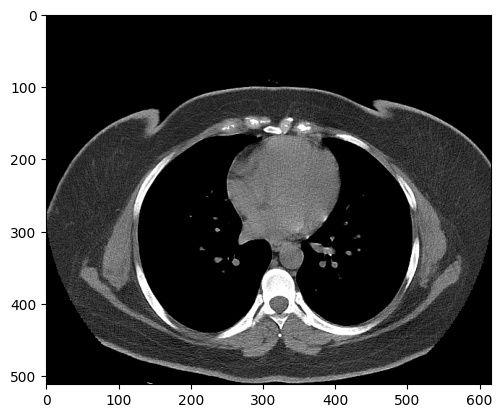

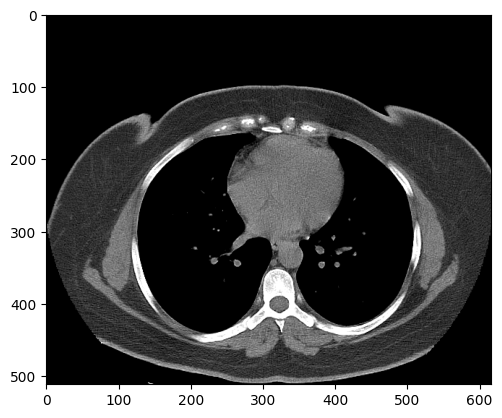

In [21]:
i=10
for image in norm_final:
    i+=1
    plt.imshow(image, cmap='gray')
    plt.show()
    if(i==25):
        break

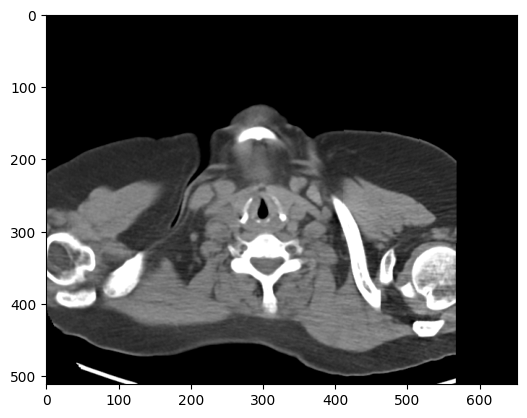

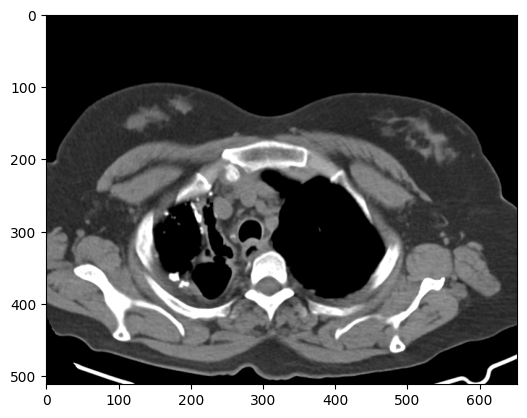

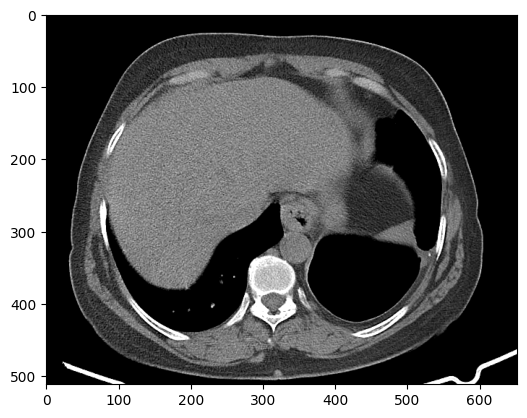

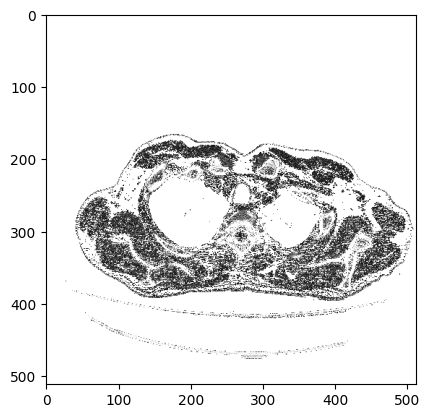

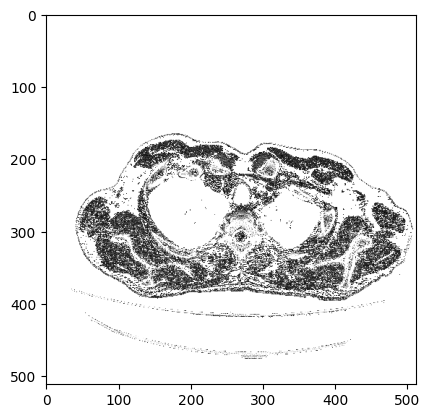

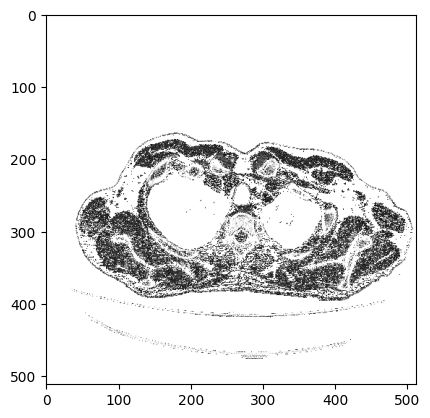

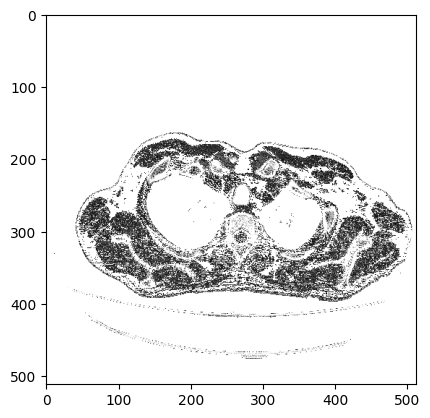

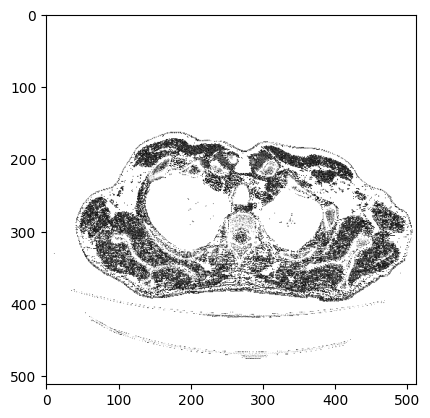

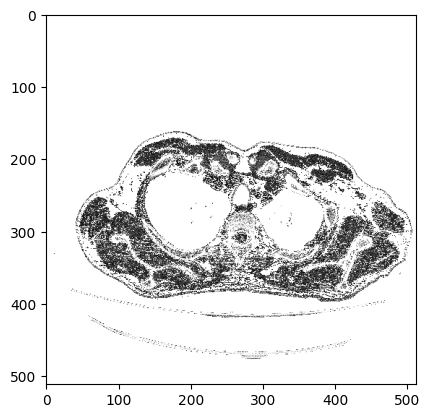

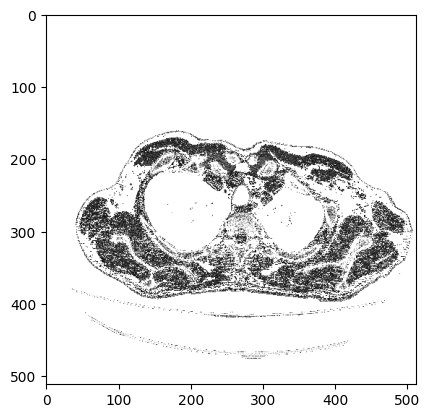

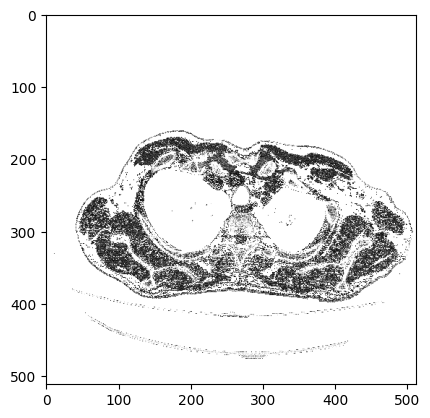

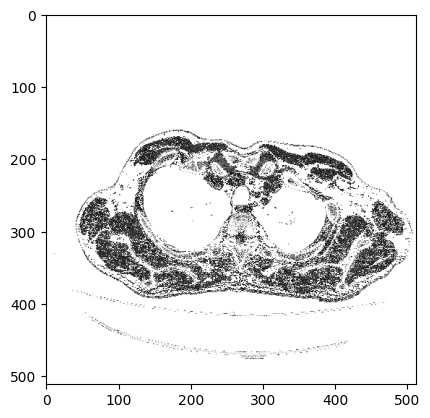

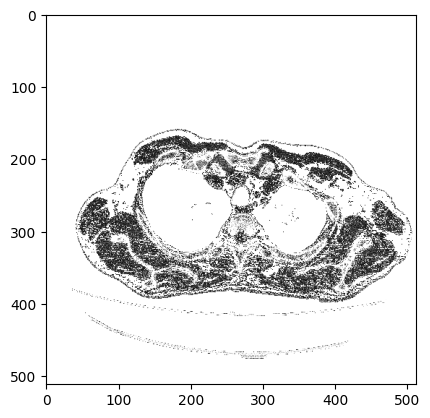

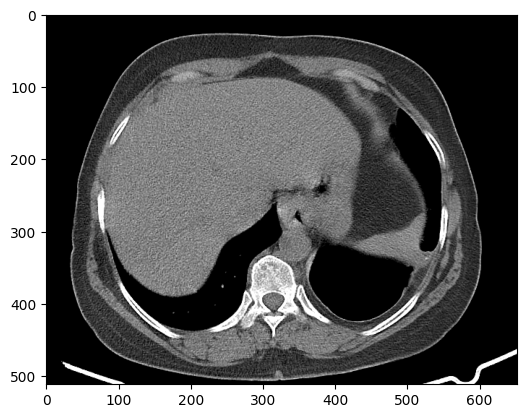

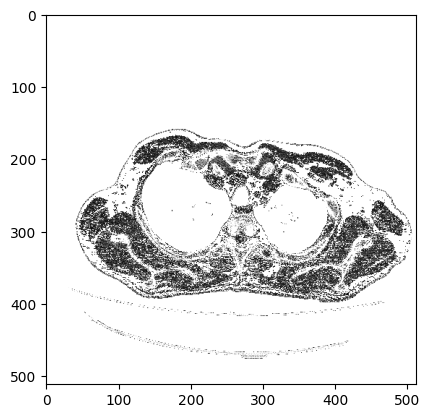

In [22]:
i=10
for image in copd_final:
    i+=1
    plt.imshow(image, cmap='gray')
    plt.show()
    if(i==25):
        break

<center><b><h1 style="font-size: 38px; color: red;"><u>Transfer learning using VGG16</u></h1></b></center>

In [24]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [25]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_directory(source_directory, train_directory,validation_directory, test_directory,valid_size, test_size, random_state=None):
    # Ensure destination directories exist
    os.makedirs(train_directory, exist_ok=True)
    os.makedirs(validation_directory, exist_ok=True)
    os.makedirs(test_directory, exist_ok=True)

    # Get the list of files in the source directory
    files = os.listdir(source_directory)

    # Split files into train and test sets
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=random_state)
    train_files, validation_files = train_test_split(train_files, test_size = valid_size, random_state=random_state)

    # Copy files to train directory
    for file in train_files:
        source_path = os.path.join(source_directory, file)
        destination_path = os.path.join(train_directory, file)

        # Skip directories
        if os.path.isdir(source_path):
            continue

        shutil.copyfile(source_path, destination_path)
        
    # Copy files to validation directory
    for file in validation_files:
        source_path = os.path.join(source_directory, file)
        destination_path = os.path.join(validation_directory, file)

        # Skip directories
        if os.path.isdir(source_path):
            continue

        shutil.copyfile(source_path, destination_path)
        
    # Copy files to test directory
    for file in test_files:
        source_path = os.path.join(source_directory, file)
        destination_path = os.path.join(test_directory, file)

        # Skip directories
        if os.path.isdir(source_path):
            continue

        shutil.copyfile(source_path, destination_path)

# # Example usage
# source_directory = "png/COPD"
# train_directory = "data/train/COPD"
# test_directory = "data/test/COPD"

# split_directory(source_directory, train_directory, test_directory, test_size=0.2, random_state=42)



In [26]:
import shutil

folder_to_delete = 'data2'

# Use shutil.rmtree() to delete the folder and its contents
shutil.rmtree(folder_to_delete)

print(f"The folder '{folder_to_delete}' has been deleted.")

The folder 'data2' has been deleted.


In [27]:
# Example usage
source_directory = "png/COPD"
train_directory = "data2/train/COPD"
test_directory = "data2/test/COPD"
validation_directory = "data2/validation/COPD"

split_directory(source_directory, train_directory,validation_directory, test_directory,valid_size = 0.20, test_size=0.10, random_state=42)


In [28]:
source_directory = "png/NORMAL"
train_directory = "data2/train/NORMAL"
test_directory = "data2/test/NORMAL"
validation_directory = "data2/validation/NORMAL"

split_directory(source_directory, train_directory,validation_directory, test_directory,valid_size = 0.20, test_size=0.10, random_state=42)

In [29]:
import shutil

folder_to_delete = 'filtered_data'

# Use shutil.rmtree() to delete the folder and its contents
shutil.rmtree(folder_to_delete)

print(f"The folder '{folder_to_delete}' has been deleted.")

The folder 'filtered_data' has been deleted.


In [30]:
import os
import shutil

class_indices = {'.ipynb_checkpoints': 0, 'COPD': 1, 'NORMAL': 2}

# Remove the '.ipynb_checkpoints' class
class_indices = {k: v for k, v in class_indices.items() if k != '.ipynb_checkpoints'}

# Specify your source and destination directories
source_directory = 'data2/train'
destination_directory = 'filtered_data/train'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Iterate through the source directory
for class_name, class_index in class_indices.items():
    class_source_path = os.path.join(source_directory, class_name)
    class_destination_path = os.path.join(destination_directory, class_name)
    
    # Create the destination directory for the class
    os.makedirs(class_destination_path, exist_ok=True)
    
    # Copy files from the source to the destination directory
    for file_name in os.listdir(class_source_path):
        if file_name == '.ipynb_checkpoints':
            continue  # Skip problematic folder
        file_source_path = os.path.join(class_source_path, file_name)
        file_destination_path = os.path.join(class_destination_path, file_name)
        shutil.copyfile(file_source_path, file_destination_path)

print("Dataset filtered and updated successfully.")


Dataset filtered and updated successfully.


In [31]:
import os
import shutil

class_indices = {'.ipynb_checkpoints': 0, 'COPD': 1, 'NORMAL': 2}

# Remove the '.ipynb_checkpoints' class
class_indices = {k: v for k, v in class_indices.items() if k != '.ipynb_checkpoints'}

# Specify your source and destination directories
source_directory = 'data2/validation'
destination_directory = 'filtered_data/validation'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Iterate through the source directory
for class_name, class_index in class_indices.items():
    class_source_path = os.path.join(source_directory, class_name)
    class_destination_path = os.path.join(destination_directory, class_name)
    
    # Create the destination directory for the class
    os.makedirs(class_destination_path, exist_ok=True)
    
    # Copy files from the source to the destination directory
    for file_name in os.listdir(class_source_path):
        if file_name == '.ipynb_checkpoints':
            continue  # Skip problematic folder
        file_source_path = os.path.join(class_source_path, file_name)
        file_destination_path = os.path.join(class_destination_path, file_name)
        shutil.copyfile(file_source_path, file_destination_path)

print("Dataset filtered and updated successfully.")


Dataset filtered and updated successfully.


In [32]:
import os
import shutil

class_indices = {'.ipynb_checkpoints': 0, 'COPD': 1, 'NORMAL': 2}

# Remove the '.ipynb_checkpoints' class
class_indices = {k: v for k, v in class_indices.items() if k != '.ipynb_checkpoints'}

# Specify your source and destination directories
source_directory = 'data2/test'
destination_directory = 'filtered_data/test'

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Iterate through the source directory
for class_name, class_index in class_indices.items():
    class_source_path = os.path.join(source_directory, class_name)
    class_destination_path = os.path.join(destination_directory, class_name)
    
    # Create the destination directory for the class
    os.makedirs(class_destination_path, exist_ok=True)
    
    # Copy files from the source to the destination directory
    for file_name in os.listdir(class_source_path):
        if file_name == '.ipynb_checkpoints':
            continue  # Skip problematic folder
        file_source_path = os.path.join(class_source_path, file_name)
        file_destination_path = os.path.join(class_destination_path, file_name)
        shutil.copyfile(file_source_path, file_destination_path)

print("Dataset filtered and updated successfully.")


Dataset filtered and updated successfully.


In [33]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [35]:
#  useful for getting number of output classes
folders = glob('filtered_data/train/*')

In [36]:
len(folders)

2

In [37]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [38]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [39]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [41]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('filtered_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2667 images belonging to 2 classes.


In [45]:
validation_set = test_datagen.flow_from_directory('filtered_data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 669 images belonging to 2 classes.


In [47]:
print(training_set.class_indices)
print(validation_set.class_indices)

{'COPD': 0, 'NORMAL': 1}
{'COPD': 0, 'NORMAL': 1}


RATIO = 0.8

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<center><b><h1 style="font-size: 30px;">Taking various train-validation-test ratio and training the model!</h1></b></center>

<h1>Ratio = 0.75</h1>

In [283]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23376\3314549357.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
87/87 [==============================] - 313s 4s/step - loss: 0.0896 - accuracy: 0.9651 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 2/5
87/87 [==============================] - 311s 4s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 3/5
87/87 [==============================] - 316s 4s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 4/5
87/87 [==============================] - 318s 4s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/5
87/87 [==============================] - 310s 4s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000


<h1>Ratio = 0.9</h1>

In [307]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23376\3314549357.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


105/105 [==============================] - 242s 2s/step - loss: 0.1215 - accuracy: 0.9529 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 2/5
105/105 [==============================] - 255s 2s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3/5
105/105 [==============================] - 267s 3s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/5
105/105 [==============================] - 273s 3s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/5
105/105 [==============================] - 281s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000


 <h1>Train, Validation and Test  Split = 70 : 20 : 10</h1>

In [48]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34784\3314549357.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
84/84 [==============================] - 294s 3s/step - loss: 0.0871 - accuracy: 0.9704 - val_loss: 0.0148 - val_accuracy: 0.9970
Epoch 2/5
84/84 [==============================] - 284s 3s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9970
Epoch 3/5
84/84 [==============================] - 286s 3s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9970
Epoch 4/5
84/84 [==============================] - 282s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9970
Epoch 5/5
84/84 [==============================] - 285s 3s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9970


<center><b><h1 style="font-size: 30px;">Testing the model!</h1></b></center>

In [72]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score

# Directory containing test images
test_directory = 'filtered_data/test'
copd = 'filtered_data/test/COPD'
norm = 'filtered_data/test/NORMAL'
# Get a list of all image files in the test directory
copd_files = [file for file in os.listdir(copd) if file.endswith(('.png', '.jpg', '.jpeg'))]
norm_files = [file for file in os.listdir(norm) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through each image file
for image_file in copd_files:
    # Extract the true label from the image file name or directory
    true_label = 0
    true_labels.append(true_label)
    # Construct the full path to the image
    image_path = os.path.join(copd, image_file)

    # Load and preprocess the image using Pillow
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))  # adjust target size based on your model's input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # normalize pixel values

    # Predict the class probabilities
    predictions = model.predict(img_array)

    # Assuming binary classification, use a threshold of 0.5
    predicted_label = 1 if predictions[0][0] > 0.5 else 0
    print("Predicted Label : ",predicted_label)
    print("True Label : ",true_label)
    predicted_labels.append(predicted_label)
    
# Iterate through each image file
for image_file in norm_files:
    # Extract the true label from the image file name or directory
    true_label = 1
    true_labels.append(true_label)

    # Construct the full path to the image
    image_path = os.path.join(norm, image_file)

    # Load and preprocess the image using Pillow
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))  # adjust target size based on your model's input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # normalize pixel values

    # Predict the class probabilities
    predictions = model.predict(img_array)
    
    # Assuming binary classification, use a threshold of 0.5
    predicted_label = 1 if predictions[0][0] > 0.5 else 0
    print("Predicted Label : ",predicted_label)
    print("True Label : ",true_label)
    predicted_labels.append(predicted_label)
    
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 86ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 84ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 87ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 92ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 90ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 91ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 89ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 85ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 88ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 85ms/step
Predicted Label :  0
True Label :  0
1/1 [==============================] - 0s 87ms/step
Predicted Label :  0
True Label :  0
1/1 [================

<center><b><h1 style="font-size: 30px;color: blue">The model seems to be overfitting on the data!</h1></b></center>

<center><b><h1 style="font-size: 38px; color: red;"><u>Transfer learning using Vision Transformer</u></h1></b></center>

In [5]:
# !pip install helper_functions

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms
from helper_functions import set_seeds

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT 

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False
    
# 4. Change the classifier head 
class_names = ['copd','normal']

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
# pretrained_vit # uncomment for model output 

In [4]:
# pip install torchinfo

In [5]:
from torchinfo import summary

# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 2]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [6]:
# Setup directory paths to train and test images
train_dir = 'filtered_data/train'
validation_dir = 'filtered_data/validation'
test_dir = 'filtered_data/test'

In [7]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [8]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str, 
    test_dir: str, 
    transform: transforms.Compose, 
    batch_size: int, 
    num_workers: int=NUM_WORKERS
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  validation_data = datasets.ImageFolder(validation_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  validation_dataloader = DataLoader(
      validation_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, validation_dataloader, class_names

In [9]:
# Setup dataloaders
train_dataloader_pretrained, validation_dataloader_pretrained, class_names = create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=validation_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32) # Cou

In [10]:
# !python -m venv venv
# !venv\Scripts\activate

In [20]:
# !pip install going_modular

In [22]:
# import torch
# from tqdm import tqdm

# def train_and_evaluate(model, train_loader, val_loader, optimizer, loss_fn, epochs, device):
#     model.to(device)
    
#     for epoch in range(epochs):
#         # Training
#         model.train()
#         total_loss = 0.0
#         correct_train = 0
#         total_train = 0
        
#         for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs} - Training', leave=False):
#             inputs, labels = inputs.to(device), labels.to(device)
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = loss_fn(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()

#             _, predicted = outputs.max(1)
#             total_train += labels.size(0)
#             correct_train += predicted.eq(labels).sum().item()

#         average_loss = total_loss / len(train_loader)
#         train_accuracy = correct_train / total_train
#         print(f'Training Loss: {average_loss}, Training Accuracy: {train_accuracy}')

#         # Validation
#         model.eval()
#         val_loss = 0.0
#         correct_val = 0
#         total_val = 0

#         with torch.no_grad():
#             for inputs, labels in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{epochs} - Validation', leave=False):
#                 inputs, labels = inputs.to(device), labels.to(device)
#                 outputs = model(inputs)
#                 loss = loss_fn(outputs, labels)
#                 val_loss += loss.item()

#                 _, predicted = outputs.max(1)
#                 total_val += labels.size(0)
#                 correct_val += predicted.eq(labels).sum().item()

#         average_val_loss = val_loss / len(val_loader)
#         val_accuracy = correct_val / total_val
#         print(f'Validation Loss: {average_val_loss}, Validation Accuracy: {val_accuracy}')

# # Example usage
# train_and_evaluate(model=pretrained_vit,
#                    train_loader=train_dataloader_pretrained,
#                    val_loader=validation_dataloader_pretrained,
#                    optimizer=torch.optim.Adam(params=pretrained_vit.parameters(), lr=1e-3),
#                    loss_fn=torch.nn.CrossEntropyLoss(),
#                    epochs=5,
#                    device=device)


Training Loss: 0.08452434587248024, Training Accuracy: 0.9838770153730784


Validation Loss: 0.059877804042549714, Validation Accuracy: 0.9865470852017937


Training Loss: 0.03451983835769906, Training Accuracy: 0.9932508436445444


Validation Loss: 0.03701483156155085, Validation Accuracy: 0.992526158445441


Training Loss: 0.021466449080478577, Training Accuracy: 0.9981252343457068


Validation Loss: 0.02816753965869014, Validation Accuracy: 0.992526158445441


Training Loss: 0.016146833764477855, Training Accuracy: 0.9996250468691413


Validation Loss: 0.023361858749662394, Validation Accuracy: 0.9940209267563528


Training Loss: 0.012162627849084813, Training Accuracy: 0.9996250468691413


Validation Loss: 0.01755588779286925, Validation Accuracy: 0.9970104633781763


In [25]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_loader, val_loader, optimizer, loss_fn, epochs, device):
    model.to(device)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training
        model.train()
        total_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs} - Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        average_loss = total_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(average_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{epochs} - Validation', leave=False):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                val_loss += loss.item()

                _, predicted = outputs.max(1)
                total_val += labels.size(0)
                correct_val += predicted.eq(labels).sum().item()

        average_val_loss = val_loss / len(val_loader)
        val_accuracy = correct_val / total_val
        val_losses.append(average_val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Training Loss: {average_loss}, Training Accuracy: {train_accuracy}')
        print(f'Validation Loss: {average_val_loss}, Validation Accuracy: {val_accuracy}')

    # Plotting
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    return model

Training Loss: 0.018796626007228735, Training Accuracy: 0.9977502812148481
Validation Loss: 0.0236714411197075, Validation Accuracy: 0.9955156950672646


Training Loss: 0.010830482635702495, Training Accuracy: 0.9996250468691413
Validation Loss: 0.01630693200110857, Validation Accuracy: 0.9970104633781763


Training Loss: 0.007921080254683537, Training Accuracy: 1.0
Validation Loss: 0.01338531510278006, Validation Accuracy: 0.9970104633781763


Training Loss: 0.005998161881940351, Training Accuracy: 1.0
Validation Loss: 0.010904801274938066, Validation Accuracy: 0.9985052316890882


Training Loss: 0.00466910001566811, Training Accuracy: 1.0
Validation Loss: 0.011733726312134726, Validation Accuracy: 0.9955156950672646


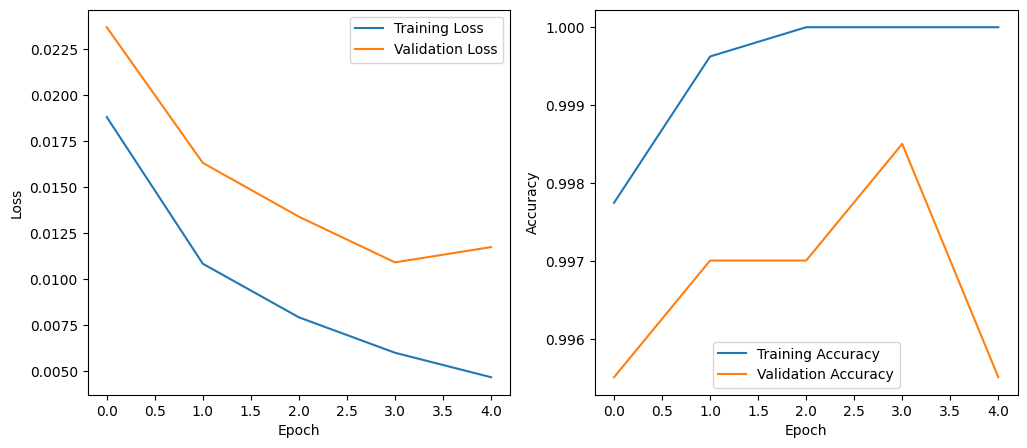

In [26]:
vt = train_and_evaluate(model=pretrained_vit,
                   train_loader=train_dataloader_pretrained,
                   val_loader=validation_dataloader_pretrained,
                   optimizer=torch.optim.Adam(params=pretrained_vit.parameters(), lr=1e-3),
                   loss_fn=torch.nn.CrossEntropyLoss(),
                   epochs=5,
                   device=device)

In [55]:
import os
from PIL import Image
import numpy as np

def load_test_data(data_dir):
    images = []
    labels = []
    
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)
                images.append(image_path)
                labels.append(label)
    
    return images, labels

# Specify the path to your test directory
test_data_dir = 'filtered_data/test'

# Load test data
test_images, test_labels = load_test_data(test_data_dir)


In [57]:
import torch
from torchvision import transforms

# Load your PyTorch model (replace 'YourModel' and 'path/to/your/model.pth' with actual values)
model = vt
# model.load_state_dict(torch.load('path/to/your/model.pth'))
model.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [72]:
from torchvision import transforms

# Define the transformation (adjust based on your model's requirements)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add other transformations if needed
])

# Preprocess test images
preprocessed_images = [transform(Image.open(img).convert('RGB')) for img in test_images]
len(preprocessed_images)

372

In [59]:
with torch.no_grad():
    inputs = torch.stack(preprocessed_images)
    outputs = model(inputs)
    predictions = torch.argmax(outputs, dim=1).numpy()

In [60]:
# Convert labels to numeric format
label_to_index = {'COPD': 0, 'NORMAL': 1}  # Update with your actual class labels
ground_truth_numeric = np.array([label_to_index[label] for label in test_labels])

# Calculate accuracy
correct_predictions = np.sum(predictions == ground_truth_numeric)
total_samples = len(ground_truth_numeric)

test_accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 86.29%


Test Accuracy: 86.29%
              precision    recall  f1-score   support

        COPD       0.85      1.00      0.92       279
      Normal       1.00      0.45      0.62        93

    accuracy                           0.86       372
   macro avg       0.92      0.73      0.77       372
weighted avg       0.88      0.86      0.84       372



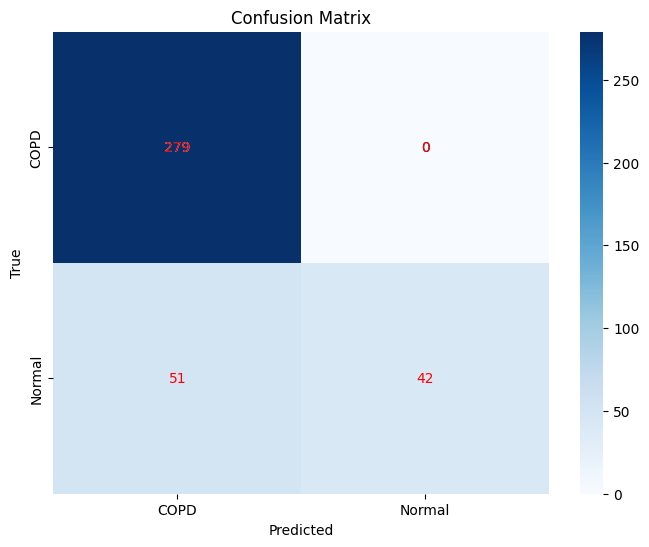

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Convert labels to numeric format
label_to_index = {'COPD': 0, 'NORMAL': 1}  # Update with your actual class labels
ground_truth_numeric = np.array([label_to_index[label] for label in test_labels])

# Create the confusion matrix
conf_matrix = confusion_matrix(ground_truth_numeric, predictions)

# Calculate accuracy
test_accuracy = accuracy_score(ground_truth_numeric, predictions)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print classification report
class_names = ['COPD', 'Normal']  # Update with your actual class names
print(classification_report(ground_truth_numeric, predictions, target_names=class_names))

# Plot the confusion matrix with correct and incorrect counts
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display both correct and incorrect counts
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

<center><b><h1 style="font-size: 30px;">Vision Transformer gives a better result than VGG16.</h1></b></center>